In [1]:
import pandas as pd

In [2]:
import json
import requests

In [3]:
r = requests.get('https://api.eia.gov/bulk/manifest.txt')

In [4]:
data = r.json()

In [5]:
data.keys()

dict_keys(['dataset'])

In [6]:
data['dataset'].keys()

dict_keys(['AEO.2014', 'AEO.2015', 'AEO.2016', 'AEO.2017', 'AEO.2018', 'AEO.2019', 'AEO.2020', 'AEO.2021', 'AEO.2022', 'COAL', 'EBA', 'ELEC', 'EMISS', 'IEO', 'INTL', 'NG', 'NUC_STATUS', 'PET', 'PET_IMPORTS', 'SEDS', 'STEO', 'TOTAL'])

In [7]:
df = pd.read_json(json.dumps(data['dataset']))

In [8]:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30

In [9]:
df

,AEO.2014,AEO.2015,AEO.2016,AEO.2017,AEO.2018,AEO.2019,AEO.2020,AEO.2021,AEO.2022,COAL,EBA,ELEC,EMISS,IEO,INTL,NG,NUC_STATUS,PET,PET_IMPORTS,SEDS,STEO,TOTAL
last_updated,2016-01-04T10:35:59-05:00,2016-01-04T10:35:59-05:00,2016-07-21T00:00:01-04:00,2017-06-09T15:41:55-04:00,2018-05-26T06:05:07-04:00,2019-01-23T16:06:31-05:00,2020-02-11T01:02:16-05:00,2022-02-02T13:42:42-05:00,2022-06-28T16:59:31-04:00,2022-07-07T15:54:39-04:00,2022-08-02T01:47:26-04:00,2022-07-27T10:01:06-04:00,2022-04-14T12:49:00-04:00,2021-10-06T08:50:18-04:00,2022-08-01T12:12:35-04:00,2022-07-29T11:35:02-04:00,2022-08-01T12:32:44-04:00,2022-08-01T20:26:19-04:00,2022-07-29T09:45:31-04:00,2022-06-30T12:00:35-04:00,2022-07-12T12:03:15-04:00,2022-07-25T17:07:38-04:00
category_id,964165,1370522,2102233,2227112,2641361,3161918,3604304,4047325,4435417,717234,2123635,0,2251604,2631064,2134384,714804,2889994,714755,1292190,40203,829714,711224
name,Annual Energy Outlook 2014,Annual Energy Outlook 2015,Annual Energy Outlook 2016,Annual Energy Outlook 2017,Annual Energy Outlook 2018,Annual Energy Outlook 2019,Annual Energy Outlook 2020,Annual Energy Outlook 2021,Annual Energy Outlook 2022,Coal,U.S. Electric System Operating Data,Electricity,CO2 Emissions,International Energy Outlook,International Energy Data,Natural Gas,U.S. Nuclear Outages,Petroleum,Crude Oil Imports,State Energy Data System (SEDS),Short-Term Energy Outlook,Total Energy
data_set,AEO.2014,AEO.2015,AEO.2016,AEO.2017,AEO.2018,AEO.2019,AEO.2020,AEO.2021,AEO.2022,COAL,EBA,ELEC,EMISS,IEO,INTL,NG,NUC_STATUS,PET,PET_IMPORTS,SEDS,STEO,TOTAL
identifier,AEO.2014,AEO.2015,AEO.2016,AEO.2017,AEO.2018,AEO.2019,AEO.2020,AEO.2021,AEO.2022,COAL,EBA,ELEC,EMISS,IEO,INTL,NG,NUC_STATUS,PET,PET_IMPORTS,SEDS,STEO,TOTAL
title,Annual Energy Outlook 2014,Annual Energy Outlook 2015,Annual Energy Outlook 2016,Annual Energy Outlook 2017,Annual Energy Outlook 2018,Annual Energy Outlook 2019,Annual Energy Outlook 2020,Annual Energy Outlook 2021,Annual Energy Outlook 2022,Coal,U.S. Electric System Operating Data (Older Tha...,Electricity,Emissions,International Energy Outlook,International Energy Data,Natural Gas,Nuclear outages,Petroleum and other liquid fuels,Petroleum Imports,State Energy Data System (SEDS),Short-Term Energy Outlook,Total Energy
description,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,The Annual Energy Outlook (AEO) from EIA.gov p...,"Aggregate national, state, and mine-level coal...",NaN,"Aggregate national, state, and plant-level ele...",NaN,The International Outlook presents an assessme...,The International Energy System (IES) from EIA...,"Statistics of U.S. natural gas production, imp...",NaN,Statistics of U.S. petroleum and other liquid ...,"Aggregate national, PADD, state, city, port, a...",State and national energy production and consu...,The Short Term Energy Outlook is a monthly rep...,"U.S. total energy production, prices, carbon d..."
keyword,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,Annual Energy Outlook AEO EIA Energy Informati...,United States state coal mine production quali...,NaN,United States state electricity plant generati...,NaN,International Energy Outlook IEO EIA Energy In...,International Energy System IES Energy Informa...,United States natural gas production imports e...,NaN,United States p

In [10]:
%%time
# 1.1 GB!
# mega = pd.read_json('/home/tpb/Downloads/pudl_scrapers/scraped/eia_bulk_elec/2022-07-22#001/ELEC.txt', lines=True)
mega = pd.read_json('/home/tpb/Downloads/pudl_scrapers/scraped/eia_bulk_elec/2022-07-22#001/head.txt', lines=True)

CPU times: user 9.86 ms, sys: 721 µs, total: 10.6 ms
Wall time: 16.9 ms


In [11]:
mega.shape

(10, 16)

In [12]:
mega.iat[0,1]

'Electric fuel consumption MMBtu : Newman (PA) (54250) : residual fuel oil : all primemovers : monthly'

In [13]:
mega.iat[0,0]

'ELEC.PLANT.CONS_EG_BTU.54250-RFO-ALL.M'

In [17]:
mega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679746 entries, 0 to 679745
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   series_id           660685 non-null  object 
 1   name                679746 non-null  object 
 2   units               665605 non-null  object 
 3   f                   662284 non-null  object 
 4   copyright           660685 non-null  object 
 5   source              660685 non-null  object 
 6   iso3166             642146 non-null  object 
 7   lat                 572197 non-null  float64
 8   lon                 572152 non-null  float64
 9   geography           660307 non-null  object 
 10  start               660685 non-null  object 
 11  end                 660685 non-null  object 
 12  last_updated        660685 non-null  object 
 13  latlon              572152 non-null  object 
 14  data                660685 non-null  object 
 15  description         453297 non-nul

In [18]:
mega.memory_usage(deep=True) / 2**20

Index                   0.000122
series_id              57.268373
name                  101.398344
units                  42.186358
f                      37.165886
copyright              39.016473
source                 63.589527
iso3166                39.720645
lat                     5.186050
lon                     5.186050
geography              40.762760
start                  39.857518
end                    39.857518
last_updated           52.248117
latlon                 44.242805
data                  419.277420
description            57.587843
geoset_id              24.603650
category_id             5.186050
parent_category_id      5.186050
notes                  21.081349
childseries            27.259628
relation_id            20.821578
vertex                 21.036987
bar_facets             20.822433
stack_facets           20.742668
geoset_ids             20.830582
summable               20.783850
dtype: float64

In [19]:
mega.memory_usage(deep=True).sum() / 2**20

1292.9066381454468

In [20]:
mega.head()

,series_id,name,units,f,copyright,source,iso3166,lat,lon,geography,start,end,last_updated,latlon,data,description,geoset_id,category_id,parent_category_id,notes,childseries,relation_id,vertex,bar_facets,stack_facets,geoset_ids,summable
0,ELEC.PLANT.CONS_EG_BTU.54250-RFO-ALL.M,Electric fuel consumption MMBtu : Newman (PA) ...,MMBtu,M,None,"EIA, U.S. Energy Information Administration",USA-PA,40.013993,-75.052830,USA-PA,200201,202203,2022-05-24T10:42:22-04:00,"40.013993,-75.05283","[[202012, 32], [202011, 27], [202010, 23], [20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC.PLANT.CONS_EG_BTU.54251-WAT-ALL.M,Electric fuel consumption MMBtu : Opal Springs...,MMBtu,M,None,"EIA, U.S. Energy Information Administration",USA-OR,44.490040,-121.298812,USA-OR,200101,202203,2022-05-24T10:42:22-04:00,"44.49004,-121.298812","[[202012, 17587], [202011, 17145], [202010, 14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC.PLANT.CONS_EG_BTU.54267-WAT-HY.M,Electric fuel consumption MMBtu : Koma Kulshan...,MMBtu,M,None,"EIA, U.S. Energy Information Administration",USA-WA,48.680178,-121.723294,USA-WA,200301,202203,2022-05-24T10:42:22-04:00,"48.680178,-121.723294","[[202012, 28753], [202011, 27509], [202010, 21...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC.PLANT.CONS_EG_BTU.54238-NG-ALL.Q,Electric fuel consumption MMBtu : Stockton Bio...,MMBtu,Q,None,"EIA, U.S. Energy Information Administration",USA-CA,37.943633,-121.330433,USA-CA,2001Q1,2022Q1,2022-05-24T10:42:22-04:00,"37.943633,-121.330433","[[2020Q4, 10546], [2020Q3, 1280], [2020Q2, 254...",Natural Gas;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC.PLANT.CONS_EG_BTU.54238-NG-ST.M,Electric fuel consumption MMBtu : Stockton Bio...,MMBtu,M,None,"EIA, U.S. Energy Information Administration",USA-CA,37.943633,-121.330433,USA-CA,201301,202203,2022-05-24T10:42:22-04:00,"37.943633,-121.330433","[[202012, 61], [202011, 54], [202010, 10431], ...",Natural Gas;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
mega['units'].str.contains('\$|dollar', regex=True).sum()

6318

In [22]:
dollars = mega.loc[mega['series_id'].str.contains('COST_BTU', regex=False).fillna(False), :].dropna(subset='data')

In [23]:
dollars.sample(5)

,series_id,name,units,f,copyright,source,iso3166,lat,lon,geography,start,end,last_updated,latlon,data,description,geoset_id,category_id,parent_category_id,notes,childseries,relation_id,vertex,bar_facets,stack_facets,geoset_ids,summable
86809,ELEC.COST_BTU.PEL-WSC-1.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",NaN,NaN,NaN,USA-AR+USA-LA+USA-OK+USA-TX,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 26.0622], [202202, 20.5657], [202201...",Summation of all petroleum liquids (distallte ...,ELEC.COST_BTU.PEL-1.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88724,ELEC.COST_BTU.NG-OH-98.Q,Average cost of fossil fuels for electricity g...,dollars per million Btu,Q,None,"EIA, U.S. Energy Information Administration",USA-OH,NaN,NaN,USA-OH,2008Q1,2022Q1,2022-05-24T10:42:22-04:00,NaN,"[[2022Q1, 4.408857128871026], [2021Q4, 4.55213...",Natural Gas; Power plants owned by companies w...,ELEC.COST_BTU.NG-98.Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85904,ELEC.COST_BTU.COW-US-5.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",USA,NaN,NaN,USA,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0], [202202, 3.95], [202201, 3.95], ...",Summation of all types of coal; Power plants i...,ELEC.COST_BTU.COW-5.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483162,ELEC.COST_BTU.NG-US-3.A,Average cost of fossil fuels for electricity g...,dollars per million Btu,A,None,"EIA, U.S. Energy Information Administration",USA,NaN,NaN,USA,2008,2021,2022-02-25T15:25:17-05:00,NaN,"[[2021, None], [2020, None], [2019, None], [20...",Natural Gas; Power plants owned by regualted e...,ELEC.COST_BTU.NG-3.A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85857,ELEC.COST_BTU.COW-US-2.Q,Average cost of fossil fuels for electricity g...,dollars per million Btu,Q,None,"EIA, U.S. Energy Information Administration",USA,NaN,NaN,USA,2008Q1,2022Q1,2022-05-24T10:42:22-04:00,NaN,"[[2022Q1, 2.021867441700527], [2021Q4, 1.87316...",Summation of all types of coal; Power plants o...,ELEC.COST_BTU.COW-2.Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dollars.shape

(2286, 27)

In [25]:
dollars['series_id'].str.startswith('ELEC.').all()

True

In [27]:
dollars.loc[dollars['series_id'].str.match('ELEC\.COST_BTU\.NG-\w{2,3}-96\.M'), :].head()

,series_id,name,units,f,copyright,source,iso3166,lat,lon,geography,start,end,last_updated,latlon,data,description,geoset_id,category_id,parent_category_id,notes,childseries,relation_id,vertex,bar_facets,stack_facets,geoset_ids,summable
86471,ELEC.COST_BTU.NG-MA-96.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",USA-MA,NaN,NaN,USA-MA,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0], [202202, 0], [202201, 0], [20211...",Natural Gas; Power plants in the commercial se...,ELEC.COST_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86536,ELEC.COST_BTU.NG-CT-96.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0], [202202, 0], [202201, 0], [20211...",Natural Gas; Power plants in the commercial se...,ELEC.COST_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86670,ELEC.COST_BTU.NG-WNC-96.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",NaN,NaN,NaN,USA-IA+USA-KS+USA-MN+USA-MO+USA-ND+USA-NE+USA-SD,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, None], [202202, None], [202201, None...",Natural Gas; Power plants in the commercial se...,ELEC.COST_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86682,ELEC.COST_BTU.NG-WSC-96.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",NaN,NaN,NaN,USA-AR+USA-LA+USA-OK+USA-TX,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0], [202202, 0], [202201, 0], [20211...",Natural Gas; Power plants in the commercial se...,ELEC.COST_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86738,ELEC.COST_BTU.NG-ENC-96.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",NaN,NaN,NaN,USA-IL+USA-IN+USA-MI+USA-OH+USA-WI,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, None], [202202, None], [202201, None...",Natural Gas; Power plants in the commercial se...,ELEC.COST_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# series_id format for FRC fields is series-fuel-region-sector-frequency

In [28]:
dollars.at[85756, 'name']

'Average cost of fossil fuels for electricity generation (per Btu) : coal : Pacific Contiguous (total) : all sectors : monthly'

In [29]:
# now find receipts [update: "RECEIPTS_BTU"]
mega.loc[mega['series_id'].str.endswith('.NG-CT-96.M').fillna(False), :]

,series_id,name,units,f,copyright,source,iso3166,lat,lon,geography,start,end,last_updated,latlon,data,description,geoset_id,category_id,parent_category_id,notes,childseries,relation_id,vertex,bar_facets,stack_facets,geoset_ids,summable
84632,ELEC.GEN.NG-CT-96.M,Net generation : natural gas : Connecticut : a...,thousand megawatthours,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200101,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 25.20348], [202202, 26.55677], [2022...",Natural Gas; Power plants in the commercial se...,ELEC.GEN.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86536,ELEC.COST_BTU.NG-CT-96.M,Average cost of fossil fuels for electricity g...,dollars per million Btu,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0], [202202, 0], [202201, 0], [20211...",Natural Gas; Power plants in the commercial se...,ELEC.COST_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90917,ELEC.COST.NG-CT-96.M,Average cost of fossil fuels for electricity g...,dollars per mcf,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0], [202202, 0], [202201, 0], [20211...",Natural Gas; Power plants in the commercial se...,ELEC.COST.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93264,ELEC.CONS_UTO.NG-CT-96.M,Consumption for useful thermal output : natura...,thousand Mcf,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200101,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 161.133], [202202, 156.075], [202201...",Natural Gas; Power plants in the commercial se...,ELEC.CONS_UTO.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93700,ELEC.CONS_UTO_BTU.NG-CT-96.M,Consumption for useful thermal output (Btu) : ...,million MMBtu,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200101,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0.17073000000000002], [202202, 0.165...",Natural Gas; Power plants in the commercial se...,ELEC.CONS_UTO_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98672,ELEC.CONS_TOT_BTU.NG-CT-96.M,Total consumption (Btu) : natural gas : Connec...,million MMBtu,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200101,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0.32316], [202202, 0.32572], [202201...",Natural Gas; Power plants in the commercial se...,ELEC.CONS_TOT_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102443,ELEC.CONS_TOT.NG-CT-96.M,Total consumption : natural gas : Connecticut ...,thousand Mcf,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200101,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 305.063], [202202, 307.123], [202201...",Natural Gas; Power plants in the commercial se...,ELEC.CONS_TOT.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104645,ELEC.CONS_EG.NG-CT-96.M,Consumption for electricity generation : natur...,thousand Mcf,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200101,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 143.93], [202202, 151.048], [202201,...",Natural Gas; Power plants in the commercial se...,ELEC.CONS_EG.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108361,ELEC.CONS_EG_BTU.NG-CT-96.M,Consumption for electricity generation (Btu) :...,million MMBtu,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200101,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0.15243], [202202, 0.16003], [202201...",Natural Gas; Power plants in the commercial se...,ELEC.CONS_EG_BTU.NG-96.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184339,ELEC.RECEIPTS.NG-CT-96.M,Receipts of fossil fuels by electricity plants...,thousand mcf,M,None,"EIA, U.S. Energy Information Administration",USA-CT,NaN,NaN,USA-CT,200801,202203,2022-05-24T10:42:22-04:00,NaN,"[[202203, 0], [202202, 0], [202201, 0], [20211...",Natural Gas; Power plants in the commercial se...,ELEC.RECEIPTS.NG-96.M,N

In [30]:
receipts = mega.loc[mega['series_id'].str.contains('RECEIPTS_BTU', regex=False).fillna(False), :].dropna(subset='data')
receipts.shape

(6482, 27)

In [59]:
keys = receipts['series_id'].str.split('[\.-]', expand=True, regex=True).rename(columns=dict(zip(range(6), ['elec', 'series', 'fuel', 'region', 'sector', 'frequency'])))
keys

,elec,series,fuel,region,sector,frequency
182581,ELEC,RECEIPTS_BTU,COW,NEW,99,Q
182582,ELEC,RECEIPTS_BTU,COW,NV,99,M
182612,ELEC,RECEIPTS_BTU,COW,ME,7,M
182613,ELEC,RECEIPTS_BTU,COW,ME,7,Q
182614,ELEC,RECEIPTS_BTU,COW,ME,94,Q
...,...,...,...,...,...,...
660638,ELEC,RECEIPTS_BTU,SUB,ESC,2,M
660660,ELEC,RECEIPTS_BTU,SUB,KY,2,Q
660661,ELEC,RECEIPTS_BTU,SUB,ESC,94,Q
660662,ELEC,RECEIPTS_BTU,SUB,ESC,2,Q


In [60]:
keys.describe()

,elec,series,fuel,region,sector,frequency
count,6482,6482,6482,6482,6482,6482
unique,1,1,7,62,12,3
top,ELEC,RECEIPTS_BTU,NG,US,99,A
freq,6482,6482,1562,225,985,2250


In [61]:
keys['fuel'].value_counts()

NG     1562
PEL    1241
COW    1230
BIT    1000
SUB     813
PC      474
LIG     162
Name: fuel, dtype: int64

In [62]:
keys['frequency'].value_counts()

A    2250
M    2138
Q    2094
Name: frequency, dtype: int64

In [63]:
keys['sector'].value_counts()

99    985
98    966
1     811
94    712
97    628
7     601
2     595
3     487
96    250
5     250
6     167
4      30
Name: sector, dtype: int64

In [64]:
keys['region'].value_counts()

US     225
ENC    175
WSC    174
WNC    164
SAT    162
      ... 
KS      54
ID      45
SD      38
DC      21
VT      18
Name: region, Length: 62, dtype: int64

In [65]:
keys_dollars = dollars['series_id'].str.split('[\.-]', expand=True, regex=True).rename(columns=dict(zip(range(6), ['elec', 'series', 'fuel', 'region', 'sector', 'frequency'])))
keys_dollars

,elec,series,fuel,region,sector,frequency
85756,ELEC,COST_BTU,COW,PCC,99,M
85763,ELEC,COST_BTU,COW,PCN,99,M
85764,ELEC,COST_BTU,COW,SAT,1,M
85765,ELEC,COST_BTU,COW,TN,99,M
85766,ELEC,COST_BTU,COW,SAT,99,M
...,...,...,...,...,...,...
620369,ELEC,COST_BTU,PC,KS,1,M
620370,ELEC,COST_BTU,PC,KS,1,Q
620371,ELEC,COST_BTU,PC,KS,98,A
620372,ELEC,COST_BTU,PC,KS,98,M


In [66]:
keys_dollars.describe()

,elec,series,fuel,region,sector,frequency
count,2286,2286,2286,2286,2286,2286
unique,1,1,7,62,12,3
top,ELEC,COST_BTU,NG,US,1,M
freq,2286,2286,694,225,826,897


In [67]:
7*62*12*3

15624

In [68]:
keys_dollars['fuel'].value_counts()

NG     694
PEL    570
COW    511
PC     163
SUB    150
BIT    149
LIG     49
Name: fuel, dtype: int64

In [69]:
keys_dollars['frequency'].value_counts()

M    897
Q    777
A    612
Name: frequency, dtype: int64

In [70]:
keys_dollars['sector'].value_counts()

1     826
98    547
94    351
99    318
97     96
96     46
7      21
2      21
3      18
6      18
5      18
4       6
Name: sector, dtype: int64

In [71]:
keys_dollars['region'].value_counts()

US     225
WSC     55
ENC     52
WNC     50
MTN     49
      ... 
ID      16
RI      14
HI      13
VT      12
DC       6
Name: region, Length: 62, dtype: int64

In [73]:
sorted(keys_dollars['region'].unique()) # difference from API is Pacific (90) and Puerto Rico (PR)

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'ENC',
 'ESC',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MAT',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'MTN',
 'NC',
 'ND',
 'NE',
 'NEW',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PCC',
 'PCN',
 'RI',
 'SAT',
 'SC',
 'SD',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WNC',
 'WSC',
 'WV',
 'WY']

<AxesSubplot:>

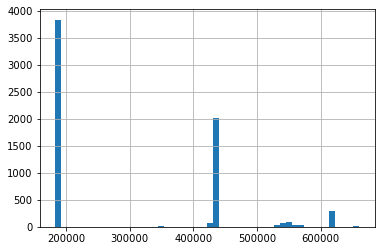

In [76]:
keys.index.to_series().hist(bins=50)

<AxesSubplot:>

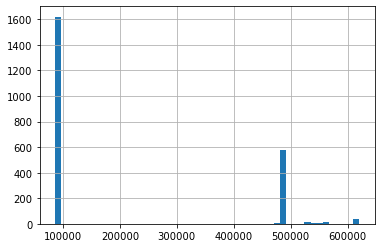

In [75]:
keys_dollars.index.to_series().hist(bins=50)